In [1]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load image and convert to RGB
image_bgr = cv2.imread('PLANEE.JPEG')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [3]:
# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

In [4]:
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

In [5]:
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [6]:
# Run grabCut
cv2.grabCut(image_rgb, # Our image
mask, # The Mask
rectangle, # Our rectangle
bgdModel, # Temporary array for background
fgdModel, # Temporary array for background
5, # Number of iterations
cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[8.81871750e-01, 5.85788562e-03, 2.94280763e-02, 7.45927210e-02,
         8.24956672e-03, 2.55000000e+02, 2.55000000e+02, 2.55000000e+02,
         1.89911243e+02, 1.90378698e+02, 1.96230769e+02, 2.37627797e+02,
         2.38109541e+02, 2.45164900e+02, 2.49083643e+02, 2.49238383e+02,
         2.50060874e+02, 2.13025210e+02, 2.13336134e+02, 2.21781513e+02,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 2.51300396e+03, 2.51242414e+03, 2.47109149e+03,
         2.51242414e+03, 2.51224712e+03, 2.46885344e+03, 2.47109149e+03,
         2.46885344e+03, 2.43749112e+03, 4.66647632e+01, 4.83752825e+01,
         3.77657342e+01, 4.83752825e+01, 5.0

In [7]:
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

In [8]:
# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

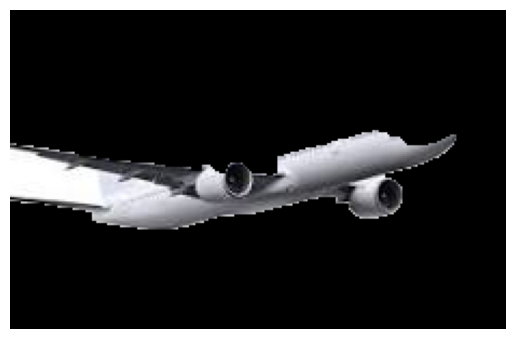

In [9]:
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

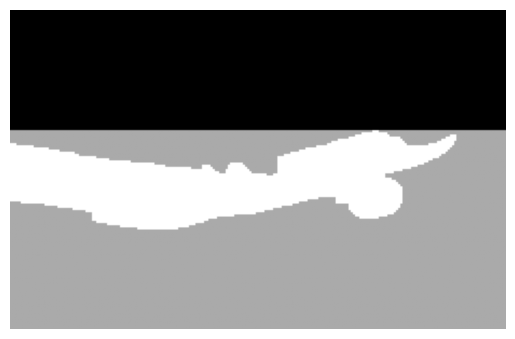

In [10]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

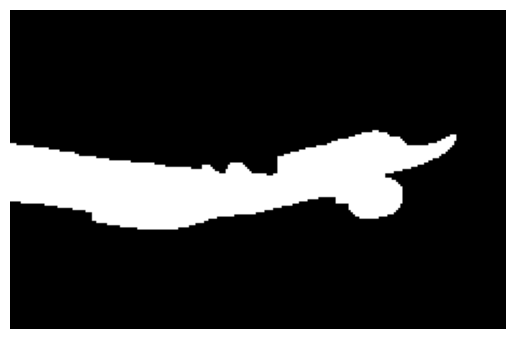

In [11]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()